# Introduction
Image enhancement is one of the crucial domains of digital image processing. By improving the visual quality of images and allowing for the extraction of obscured information, image enhancement is a cornerstone of modern digital photography and computer vision. Of the myriad techniques employed in image enhancement, histogram equilization may be the most foundational. At their core, histogram equalization methods seek to adjust the contrast of an image by redistributing pixel intensities such that details in both dark and bright areas are more visible. 

In this article, we'll delve into the techniques of histogram equalization, covering its mathematical foundation, practical implementation in python, and real-world applications. By the end of the tutorial, one should have a solid understanding of utilizing histogram equalization methods for image enhancement as well as a recognition of each technique's strengths and potential weaknesses. 

## Overview of Histograms
Clearly, prior to examining the methods of histogram equalization, one should have a solid comprehension of histograms. In data science, a histogram is a representation of the relative frequency of the elements of a dataset. When applied to image processing, a histogram can be thought of as a graph that represents the distribution of pixel intensities such that:

\begin{equation}
    h(r_{i}) = n_{i} \ \ \ \ \text{for} \ \ i = 0,1,2,...,L-1
\end{equation}

Here, $r_{k}$ is a particular intensity value between 0 and $L$ (the total number of pixel intensity levels in the image, i.e. 256 for an 8-bit image). The histogram value $n_{i}$ for the corresponding intensisty level $r_{k}$ is simply the number of pixels in the image that have the intensity value $r_{k}$. 

The concept of histograms is much easier to grasp visually. Consider the test image and its associated histogram in Figure X. We see that the x-axis of the histogram represents each of the possible 256 pixel values and the y-axis is the number of pixels of that value in the image. Here, note the clustering of pixel values in the middle of the intensity range. This is to be expected as the test image is quite grey-toned. In contrast, a dark or bright image would have histograms clustered in the lower or upper regions of pixel intesity, respectively. This leads to notion that histograms can be used as a measure of contrast. The test image, with its clustered histogram values, represents a low contrast image. Intuitively, a high contrast image has a wide range of pixel values, and therefore, has a histogram that is distributed fairly evenly between the minimum and maximum pixel intensity. This correspondance between a higher contrast image and a more distributed histogram is shown in Figure X. The fact that the manipulation of an image's histogram leads to changes in image contrast directly forshadows the techniques of histogram equalization discussed next.  

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

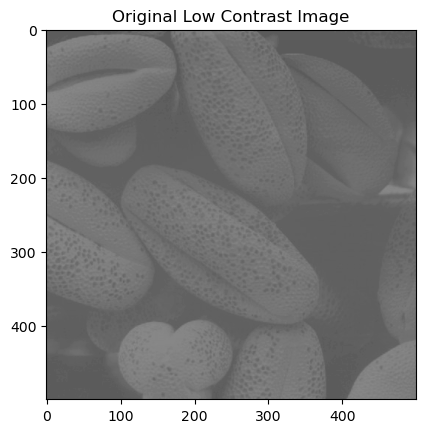

In [2]:
# Read in example image as numpy array in 8bit grayscale format
imgArr = cv.imread("Images/LowContrast.tif", cv.IMREAD_GRAYSCALE)

# Display image
plt.imshow(imgArr, cmap="gray", vmin=0, vmax=255)
plt.title("Original Low Contrast Image")
plt.show()

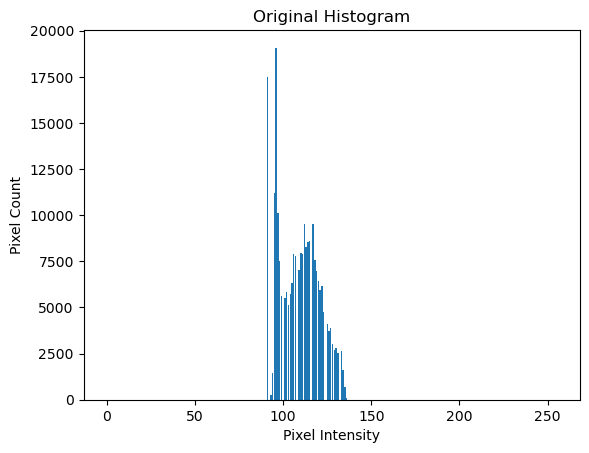

In [3]:
# Function to calculate histogram as an array
def histogram_arr(imgArr, numLevels=256):
    histogram = np.zeros(numLevels)
    for val in np.nditer(imgArr):
        histogram[val] += 1
    return histogram

# Calculate histogram of example image
imgHistogram = histogram_arr(imgArr)

# Bar plot the histogram of the example image
plt.bar(np.arange(256), imgHistogram)
plt.title("Original Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Pixel Count")
plt.show()

## Histogram Equalization


\begin{equation}
   s_{i} = T(r_{i}) = (L-1)\sum_{j=0}^{i}p_{r}(r_{j}) \ \ \ \text{for} \ \ i = 0,1,2,...,L-1
\end{equation}

\begin{equation}
   p_{r}(r_{i}) = \frac{n_{i}}{MN}
\end{equation}

\begin{equation}
\begin{split}
   F_{R}(r_{j}) = \text{cdf}_{R}(r_{j}) &= \sum_{j=0}^{i}p_{r}(r_{j}) \ \ \ \text{for} \ \ i = 0,1,2,...,L-1 \\ \\
   &= \sum_{j=0}^{i}\frac{n_{j}}{MN} \ \ \ \text{for} \ \ i = 0,1,2,...,L-1
\end{split}
\end{equation}

\begin{equation}
   s_{i} = (L-1) \cdot F_{R}(r_{j})
\end{equation}

We really want:

\begin{equation}
   s_{i} = (L-1) \cdot \hat{F}_{R}(r_{j})
\end{equation}

\begin{equation}
   \hat{x} = \frac{x-x_{min}}{x_{max} - x_{min}}
\end{equation}
   
\begin{equation}
\begin{split}
   \hat{F}_{R}(r_{j}) &= \frac{F_{R}(r_{j}) - F_{R}(r)_{min}}{F_{R}(r)_{max} - F_{R}(r)_{min}} \\ \\

   &= \frac{F_{R}(r_{j}) - F_{R}(r)_{min}}{1 - F_{R}(r)_{min}}
\end{split}
\end{equation}

Combining together we get:

\begin{equation}
   s_{i} = (L-1) \cdot \frac{F_{R}(r_{j}) - F_{R}(r)_{min}}{1 - F_{R}(r)_{min}}
\end{equation}





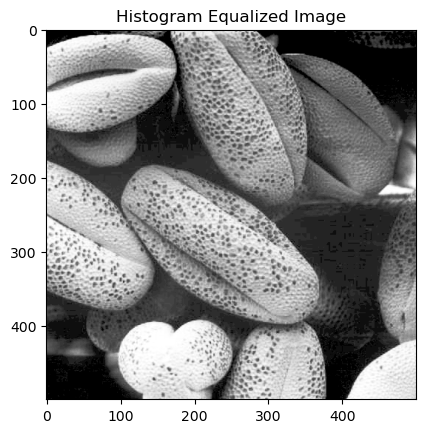

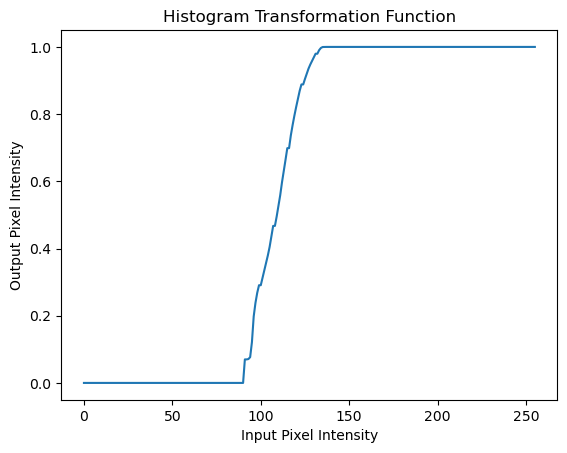

In [4]:
# Global histogram equilization function
def hist_eq(imgArr, numLevels=256):
    numPixels = imgArr.shape[0]*imgArr.shape[1]
    histogram = histogram_arr(imgArr)
    cdf = np.zeros(numLevels)
    #transArr = np.zeros(256)
    # Get transformation function
    for i in range(numLevels):
        sum = 0
        for j in range(i+1):
            #pixelProb = histogram[j]
            sum += histogram[j]
        #transArr[i] = round(((numLevels-1)*sum)/(imgArr.shape[0]*imgArr.shape[1]))
        cdf[i] = sum/numPixels #**if using just sum change below

    cdfMin = np.amin(cdf[np.nonzero(cdf)])

    # Apply transformation function
    outputArr = np.zeros(imgArr.shape, dtype=int)
    for (ind, val) in np.ndenumerate(imgArr):
        #outputArr[ind] = transArr[val]
        outputArr[ind] = round((numLevels-1)*(cdf[val]-cdfMin)/(1-cdfMin)) #** change denom to numPixel-cdfmin

    # Return the histogram equalized image and transformation function    
    return outputArr, cdf

# Apply histogram equalization to the example image
imgEqArr, transformationFunc = hist_eq(imgArr)

# Display histogram equalized image
plt.imshow(imgEqArr, cmap="gray", vmin=0, vmax=255)
plt.title("Histogram Equalized Image")
plt.show()

# Plot the transformation function
plt.plot(transformationFunc)
plt.title("Histogram Transformation Function")
plt.xlabel("Input Pixel Intensity")
plt.ylabel("Output Pixel Intensity")
plt.show()

In [5]:
# Compare to OpenCV algorithm
imgEqCVArr = cv.equalizeHist(imgArr)

subArr = imgEqArr-imgEqCVArr
